In [140]:
!pip install -q git+https://github.com/tensorflow/docs
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

In [141]:
inception_results = pd.read_csv('inception_results.csv').iloc[: , 1:].iloc[452:]
vgg_results = pd.read_csv('vgg_results.csv').iloc[: , 1:].iloc[452:]
resnet_results = pd.read_csv('resnet_results.csv').iloc[: , 1:].iloc[452:]
custom_results = pd.read_csv('custom_results.csv').iloc[: , 1:].iloc[452:]

In [142]:
import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [143]:
final_prediction = pd.Series(inception_results["predict1"])/100
y_test = pd.Series(inception_results["real"])

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

from sklearn.metrics import accuracy_score
accuracy = []
for thres in thresholds:
    final_pred = np.where(final_prediction<thres, final_prediction, 1)
    final_pred = np.where(final_pred>thres, final_pred, 0)
    accuracy.append(accuracy_score(y_test, final_pred, normalize = True))
accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)], axis=1)
accuracy.columns = ["thresholds", "accuracy"]
accuracy.sort_values(by="accuracy", ascending = False, inplace = True)
accuracy.head()

,thresholds,accuracy
8,0.2958,0.938272
10,0.2827,0.925926
9,0.2879,0.913580
12,0.2343,0.876543
13,0.2246,0.876543


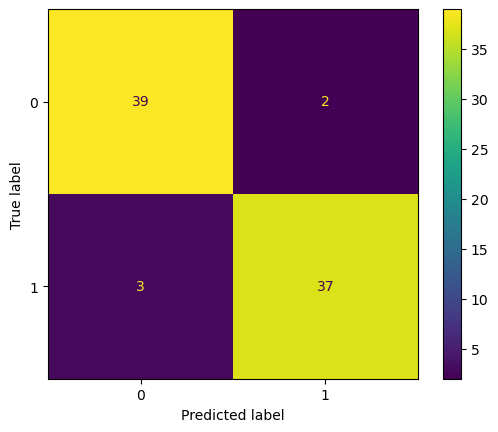

In [144]:
final_pred = np.where(final_prediction<0.2958, final_prediction, 1)
final_pred = np.where(final_pred>0.2938, final_pred, 0)
cm = confusion_matrix(y_test, final_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [145]:
final_prediction = pd.Series(vgg_results["predict1"])/100
y_test = pd.Series(inception_results["real"])

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

from sklearn.metrics import accuracy_score
accuracy = []
for thres in thresholds:
    final_pred = np.where(final_prediction<thres, final_prediction, 1)
    final_pred = np.where(final_pred>thres, final_pred, 0)
    accuracy.append(accuracy_score(y_test, final_pred, normalize = True))
accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)], axis=1)
accuracy.columns = ["thresholds", "accuracy"]
accuracy.sort_values(by="accuracy", ascending = False, inplace = True)
accuracy.head()

,thresholds,accuracy
8,0.2370,0.876543
9,0.2289,0.876543
6,0.2471,0.876543
7,0.2421,0.864198
4,0.3011,0.839506


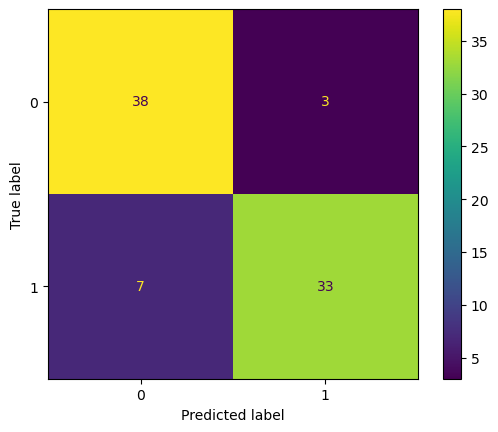

In [146]:
final_pred = np.where(final_prediction<0.2370, final_prediction, 1)
final_pred = np.where(final_pred>0.2370, final_pred, 0)
cm = confusion_matrix(y_test, final_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [147]:
final_prediction = pd.Series(resnet_results["predict1"])/100
y_test = pd.Series(inception_results["real"])

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

from sklearn.metrics import accuracy_score
accuracy = []
for thres in thresholds:
    final_pred = np.where(final_prediction<thres, final_prediction, 1)
    final_pred = np.where(final_pred>thres, final_pred, 0)
    accuracy.append(accuracy_score(y_test, final_pred, normalize = True))
accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)], axis=1)
accuracy.columns = ["thresholds", "accuracy"]
accuracy.sort_values(by="accuracy", ascending = False, inplace = True)
accuracy.head()

,thresholds,accuracy
8,0.1874,0.888889
6,0.1952,0.876543
7,0.1917,0.864198
10,0.1825,0.839506
9,0.1831,0.827160


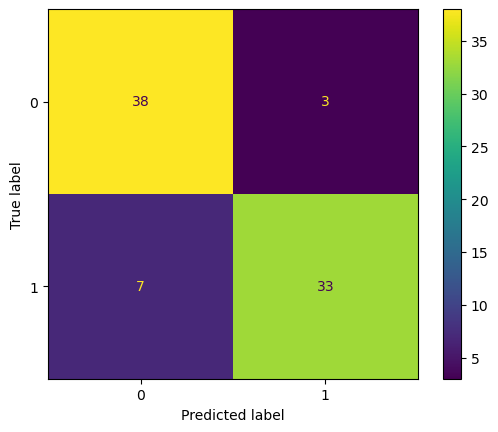

In [148]:
final_pred = np.where(final_prediction<0.1874, final_prediction, 1)
final_pred = np.where(final_pred>0.1874, final_pred, 0)
cm = confusion_matrix(y_test, final_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [149]:
final_prediction = pd.Series(custom_results["predict1"])/100
y_test = pd.Series(inception_results["real"])

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

from sklearn.metrics import accuracy_score
accuracy = []
for thres in thresholds:
    final_pred = np.where(final_prediction<thres, final_prediction, 1)
    final_pred = np.where(final_pred>thres, final_pred, 0)
    accuracy.append(accuracy_score(y_test, final_pred, normalize = True))
accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)], axis=1)
accuracy.columns = ["thresholds", "accuracy"]
accuracy.sort_values(by="accuracy", ascending = False, inplace = True)
accuracy.head()

,thresholds,accuracy
23,0.2163,0.641975
12,0.2433,0.641975
16,0.2292,0.629630
25,0.2149,0.629630
24,0.2157,0.629630


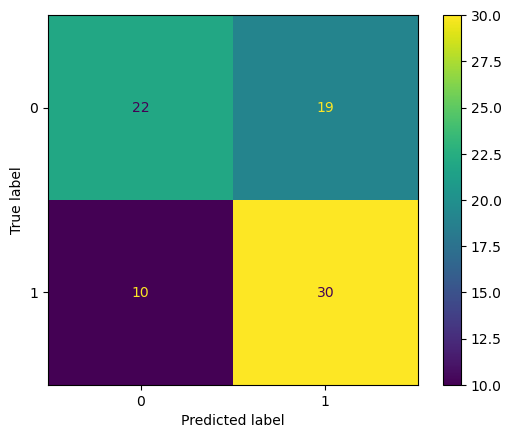

In [150]:
final_pred = np.where(final_prediction<0.216, final_prediction, 1)
final_pred = np.where(final_pred>0.216, final_pred, 0)
cm = confusion_matrix(y_test, final_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()